Часть 2

In [2]:
import pandas as pd

train_cleaned = pd.read_csv("train_cleaned.csv", low_memory=False) 
valid_cleaned = pd.read_csv("valid_cleaned.csv", low_memory=False) 

In [3]:
del valid_cleaned ['col2663']
del valid_cleaned ['col1454']

del train_cleaned ['col2663']
del train_cleaned ['col1454']

Произведу заполнение для valid_cl.csv

In [4]:
# Заполнение пропущенных значений
for col in valid_cleaned.columns:
    if valid_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        valid_cleaned[col] = valid_cleaned[col].fillna(valid_cleaned[col].median())
    elif valid_cleaned[col].dtype == 'object':  # Если колонка текстовая
        valid_cleaned[col] = valid_cleaned[col].fillna('unknown')

Произведу заполнение для train_cl.csv

In [5]:
# Заполнение пропущенных значений
for col in train_cleaned.columns:
    if train_cleaned[col].dtype in ['float64', 'int64']:  # Если колонка числовая
        train_cleaned[col] = train_cleaned[col].fillna(train_cleaned[col].median())
    elif train_cleaned[col].dtype == 'object':  # Если колонка текстовая
        train_cleaned[col] = train_cleaned[col].fillna('unknown')

Проведём проверку по пропускам

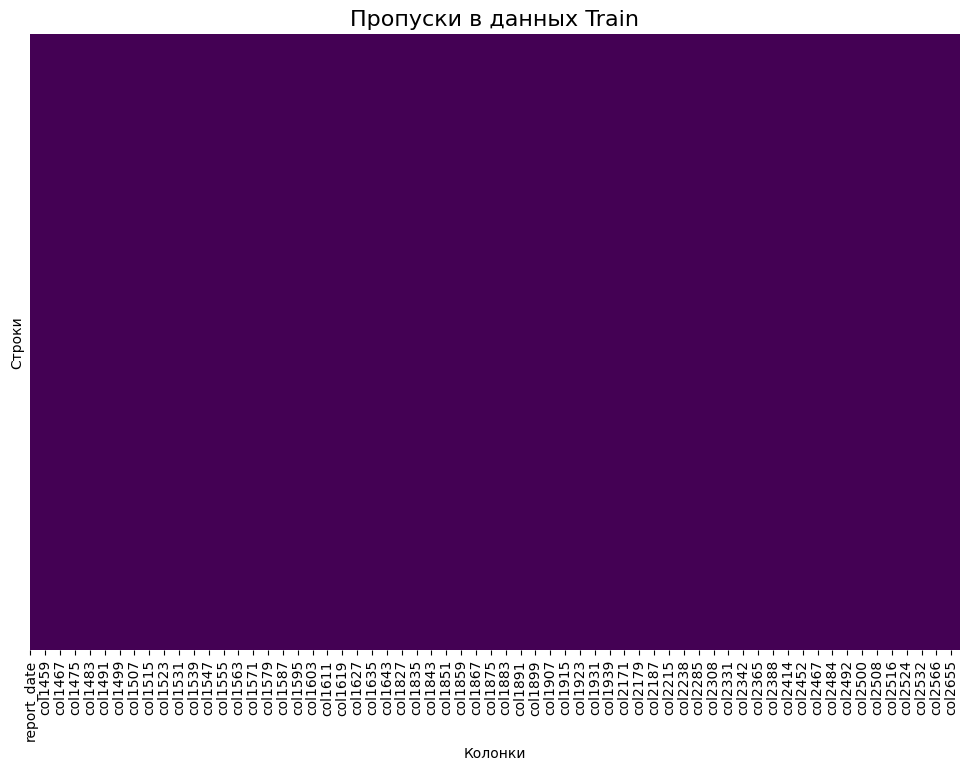

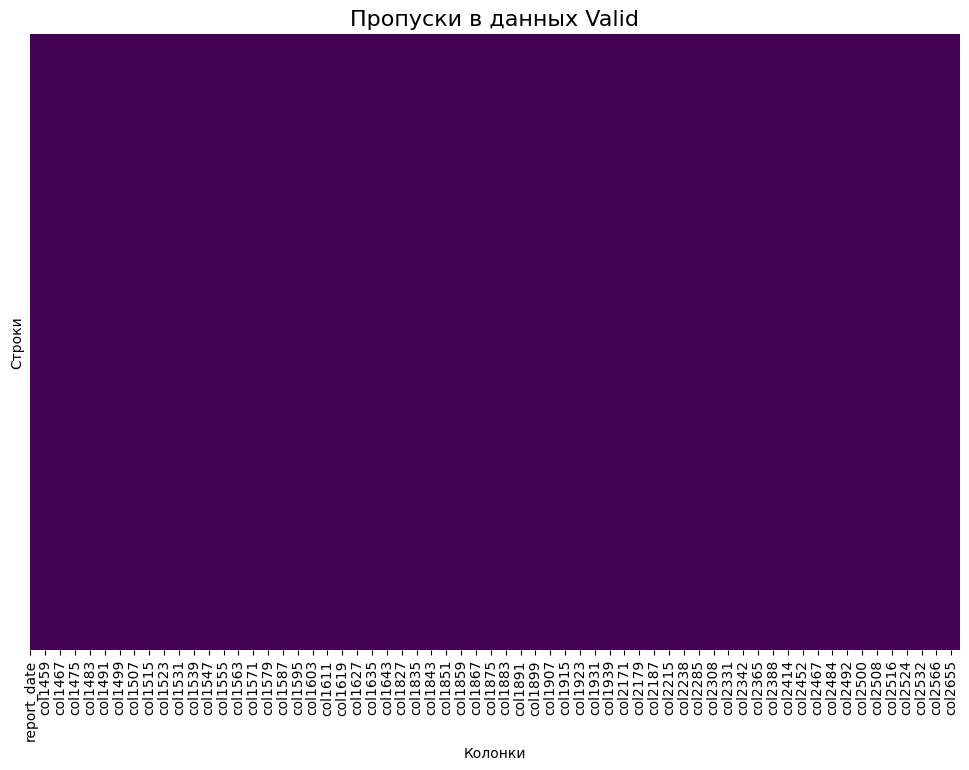

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Рассчитаем долю пропусков для каждого набора данных
train_missing_fraction = train_cleaned.isnull().mean()
valid_missing_fraction = valid_cleaned.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между train и valid
combined_missing_fraction = pd.concat([train_missing_fraction, valid_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в train
plt.figure(figsize=(12, 8))
sns.heatmap(train_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Train", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в valid
plt.figure(figsize=(12, 8))
sns.heatmap(valid_cleaned.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Пропуски в данных Valid", fontsize=16)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

In [7]:
train_cleaned

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2584,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,362.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,0.0,0.0,0.0,0.0,2.0,2.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14452,2022-09-01,1969,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14454,2021-08-01,7117,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0


In [8]:
valid_cleaned

,report_date,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,...,col2584,col2588,col2589,col2590,col2654,col2655,col2656,col2660,col2661,col2662
0,2022-11-01,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
1,2022-11-01,5,0,1,0.0,0.0,0.0,0.0,0.0,1.0,...,362.0,362.0,362.0,362.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0,7616803.0
2,2022-05-01,6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
3,2022-09-01,7,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
4,2022-08-01,8,0,0,0.0,0.0,0.0,0.0,0.0,4.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,0,0.0,0.0,0.0,0.0,2.0,2.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14452,2022-09-01,1969,1,0,0.0,0.0,0.0,0.0,0.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14453,2022-02-01,7116,1,0,0.0,1.0,1.0,1.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0
14454,2021-08-01,7117,0,0,0.0,0.0,0.0,0.0,1.0,1.0,...,242.0,242.0,242.0,242.0,6240000.0,6164000.0,6224000.0,6244578.0,6146773.5,6225550.0


Замечаем что пропусков нету, а значит можно продолжать

Начнём обучением моделей 

Для начала дропнем дубликаты файла train

In [9]:
columns_to_check = train_cleaned.columns.difference(['report_date', 'client_id', 'target'])

train_no_duplicates = train_cleaned.drop_duplicates(subset=columns_to_check)

print("\nТаблица без дубликатов по указанным колонкам:")
print(train_no_duplicates)



Таблица без дубликатов по указанным колонкам:
      report_date  client_id  target  col1453  col1455  col1456  col1457  \
0      2022-11-01          1       0        0      0.0      0.0      0.0   
1      2022-11-01          5       0        1      0.0      0.0      0.0   
2      2022-05-01          6       0        0      0.0      0.0      0.0   
3      2022-09-01          7       0        0      1.0      1.0      1.0   
4      2022-08-01          8       0        0      0.0      0.0      0.0   
...           ...        ...     ...      ...      ...      ...      ...   
14451  2022-07-01       1241       0        0      0.0      0.0      0.0   
14452  2022-09-01       1969       1        0      0.0      0.0      0.0   
14453  2022-02-01       7116       1        0      0.0      1.0      1.0   
14454  2021-08-01       7117       0        0      0.0      0.0      0.0   
14455  2022-03-01        849       0        0      0.0      0.0      1.0   

       col1458  col1459  col1460  ...  c

далее дропнем Дубликаты файла valid

In [ ]:
columns_to_check = valid_cleaned.columns.difference(['report_date', 'client_id', 'target'])

valid_no_duplicates = valid_cleaned.drop_duplicates(subset=columns_to_check)

print("\nТаблица без дубликатов по указанным колонкам:")
print(valid_no_duplicates)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Подготовка данных
X_new = train_no_duplicates.drop(columns=['client_id', 'target', 'report_date'], errors='ignore')
y = train_no_duplicates['target']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2, random_state=42, stratify=y
)

# Кодирование категориальных признаков
categorical_columns = X_train.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder()
X_train[categorical_columns] = ordinal_encoder.fit_transform(X_train[categorical_columns].astype(str))
X_test[categorical_columns] = ordinal_encoder.transform(X_test[categorical_columns].astype(str))

# Создание модели и Pipeline
random_forest_model = RandomForestClassifier(
    random_state=42,
    n_jobs=-1  # Параллельное выполнение
)

# Pipeline с SMOTE и Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Балансировка классов
    ('rf', random_forest_model)         # Обучение модели
])

# RandomizedSearchCV для поиска параметров
param_distributions = {
    'rf__n_estimators': [100, 200, 300, 500],       # Количество деревьев
    'rf__max_depth': [None, 10, 20, 30, 50],       # Максимальная глубина дерева
    'rf__min_samples_split': [2, 5, 10],           # Минимальное количество выборок для разбиения узла
    'rf__min_samples_leaf': [1, 2, 4],             # Минимальное количество выборок в листе
    'rf__class_weight': [None, 'balanced']         # Взвешивание классов
}

random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=10,  # Количество случайных комбинаций
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1  # Использовать все ядра процессора
)

# Обучение модели
random_search.fit(X_train, y_train)

# Оценка на тестовых данных
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("Лучшие параметры модели:", random_search.best_params_)
print("\nROC-AUC на тестовых данных:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report на тестовых данных:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Лучшие параметры модели: {'rf__n_estimators': 200, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_depth': 50, 'rf__class_weight': None}

ROC-AUC на тестовых данных: 0.9444078429422637

Classification Report на тестовых данных:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2774
           1       0.83      0.45      0.58        87

    accuracy                           0.98      2861
   macro avg       0.91      0.72      0.79      2861
weighted avg       0.98      0.98      0.98      2861

